##  Loan Sanction Prediction using SVM Classifier

I developed a **Support Vector Machine (SVM) classifier model** to predict whether a loan should be sanctioned to an applicant based on their personal and financial information.

---

###  Problem Overview

The objective was to classify whether a **loan should be approved or not**, based on the following customer attributes:
- Gender, Marital Status, Dependents
- Education, Employment
- Applicant & Coapplicant Income
- Loan Amount, Loan Term, Credit History
- Property Area

The dataset contains approximately **610 rows and 12 features** (excluding ID).

---

###  Data Cleaning & Preprocessing

1. **Missing Values**:
   - About **10% of the data contained missing values**.
   - I used **KNN Imputation** to smartly fill these gaps based on neighboring patterns.

2. **Encoding**:
   - Binary categorical columns were **label encoded** (e.g., Gender, Education).
   - Multiclass categorical features (like Property Area and Dependents) were **one-hot encoded**.

3. **Feature Scaling**:
   - All numerical features were **standardized** using `StandardScaler` to improve SVM performance.

4. **Handling Imbalance**:
   - The target column `Loan_Status` was **imbalanced** (more approvals than rejections).
   - I used **Stratified K-Fold Cross Validation** to ensure balanced class representation in every fold.

---

###  Exploratory Data Analysis (EDA)

- Visualized **loan approval rates** across Gender, Education, Self-Employment, Property Area.
- Found **Credit History** to be the strongest signal for loan approval.
- Detected mild skewness in income and loan amount distributions using histograms and boxplots.

---

###  Model Building

- Built an **SVM Classifier** with `class_weight='balanced'` to give equal importance to both classes.
- Evaluated the model using **Stratified K-Fold Cross Validation**.
- The final model achieved **~72% accuracy** on the test data.

---

###  Key Observations

- **Response column (`Loan_Status`) is imbalanced**, which required special care during training.
- **Missing values were non-trivial** (~10%), so KNN Imputer helped in better generalization.
- Dataset size was **moderate** (610 rows), which required careful validation to avoid overfitting.

---

###  Conclusion

Despite the dataset’s challenges (imbalance + missing values), the SVM model performed reasonably well. Future improvements could involve:
- Trying **SMOTE** for more robust balancing
- Testing other models like **XGBoost or ANN**
- Performing **hyperparameter tuning** using `GridSearchCV`



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
437,LP002401,Male,Yes,0,Graduate,No,2213,1125.0,NaN,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
499,LP002602,Male,No,0,Graduate,No,6283,4416.0,209.0,360.0,0.0,Rural,N
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y


In [5]:
df.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
df.drop('Loan_ID', axis = 1, inplace = True)

In [11]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.shape

(614, 12)

In [14]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [17]:
df.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [18]:
def print_unique_objcol_values(dataframe):
  for column in dataframe.columns:
    if dataframe[column].dtypes == "object":
      print(f"{column}: {dataframe[column].unique()}")

In [19]:
print_unique_objcol_values(df)

Gender: ['Male' 'Female' nan]
Married: ['No' 'Yes' nan]
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [20]:
obj_columns = ['Gender', 'Married', 'Dependents', 'Self_Employed']

for col in obj_columns:
  df[col].fillna(df[col].mode()[0],inplace = True)

<ipython-input-20-49a368a049b5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace = True)


In [21]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [22]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [35]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [37]:
df['Dependents'] = df['Dependents'].astype(int)

In [39]:
df.dtypes

,0
Gender,object
Married,object
Dependents,int64
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [41]:
def print_unique_objcol_values(dataframe):
  for column in dataframe.columns:
    print(f"{column}: {dataframe[column].unique()}")

In [42]:
print_unique_objcol_values(df)

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: [0 1 2 3]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
ApplicantIncome: [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 39999  9538 

In [43]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']

encoder = LabelEncoder()

for col in binary_cols:
    df[col] = encoder.fit_transform(df[col])

In [44]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [45]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


<ipython-input-45-c9681313de50>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [46]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [47]:
df['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [49]:
df = pd.get_dummies(data = df, columns = ['Property_Area'])

In [50]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,1,False,False,True
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,True
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,True
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,True


In [51]:
from sklearn.impute import KNNImputer
import pandas as pd


In [52]:
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

In [53]:
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=numeric_cols)

In [54]:
df['LoanAmount'] = df_imputed['LoanAmount']
df['Loan_Amount_Term'] = df_imputed['Loan_Amount_Term']

In [55]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [58]:
import matplotlib.pyplot as plt

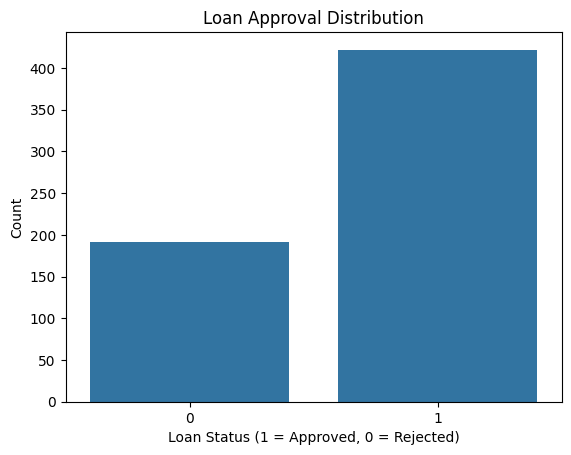

In [59]:
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Distribution')
plt.xlabel('Loan Status (1 = Approved, 0 = Rejected)')
plt.ylabel('Count')
plt.show()


In [61]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

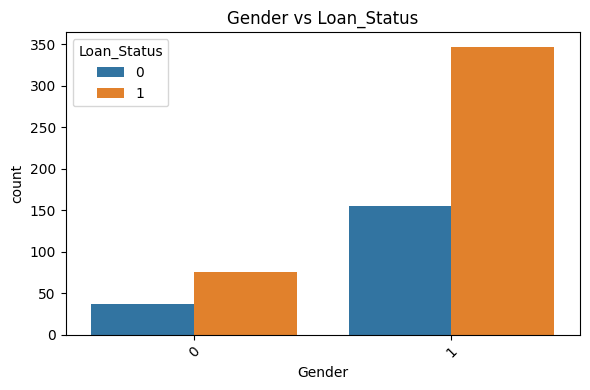

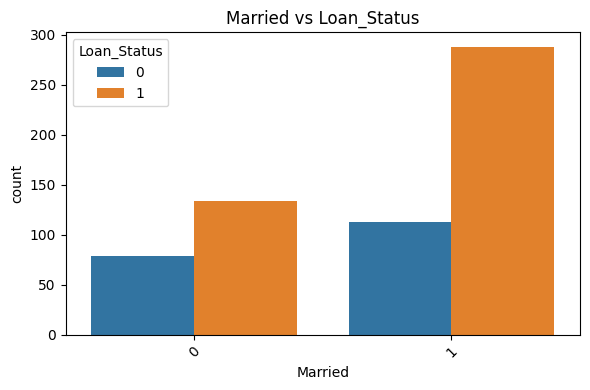

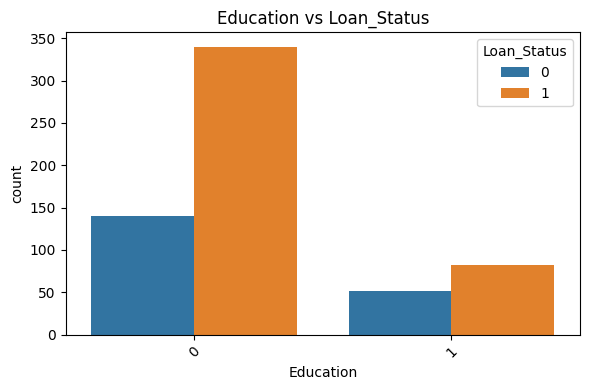

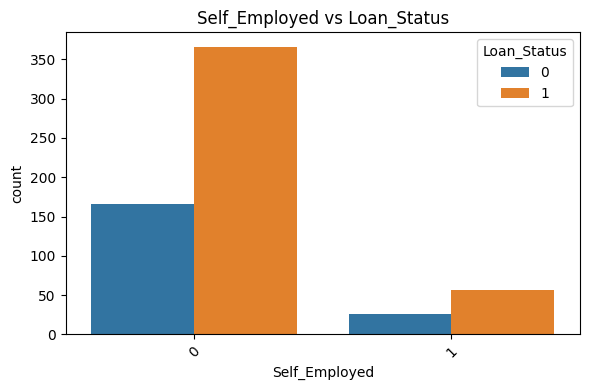

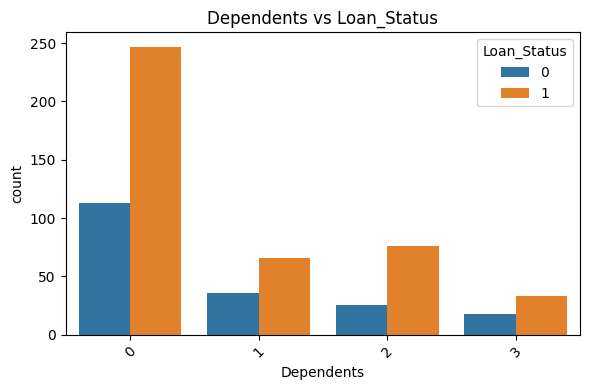

In [62]:
categorical = ['Gender', 'Married', 'Education', 'Self_Employed', 'Dependents']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='Loan_Status', data=df)
    plt.title(f'{col} vs Loan_Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


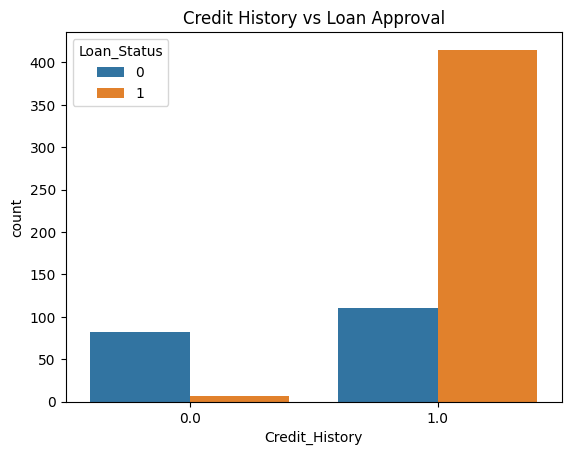

In [63]:
sns.countplot(x='Credit_History', hue='Loan_Status', data=df)
plt.title('Credit History vs Loan Approval')
plt.show()


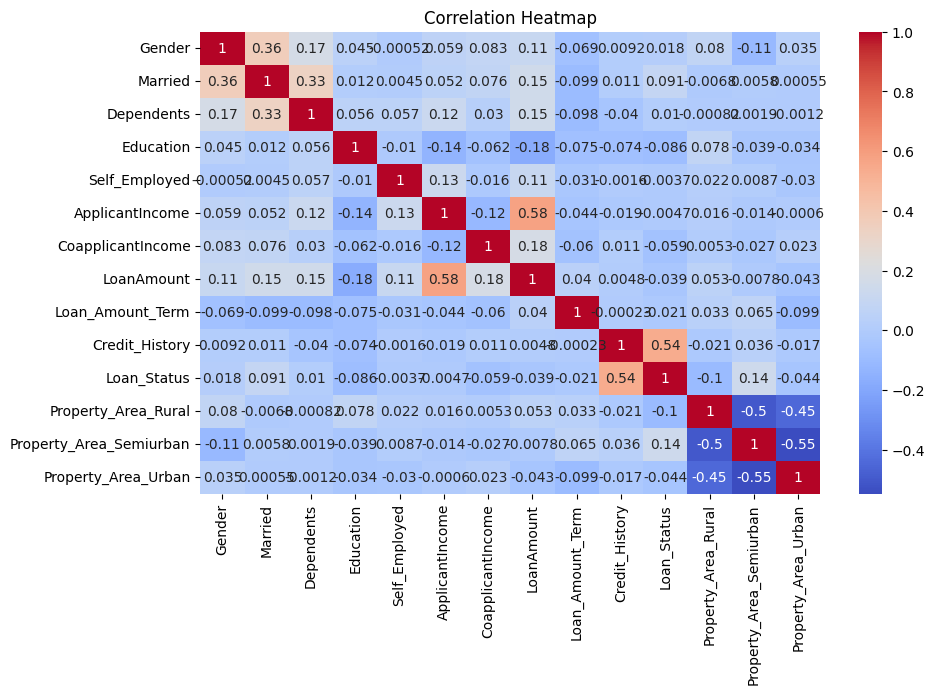

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

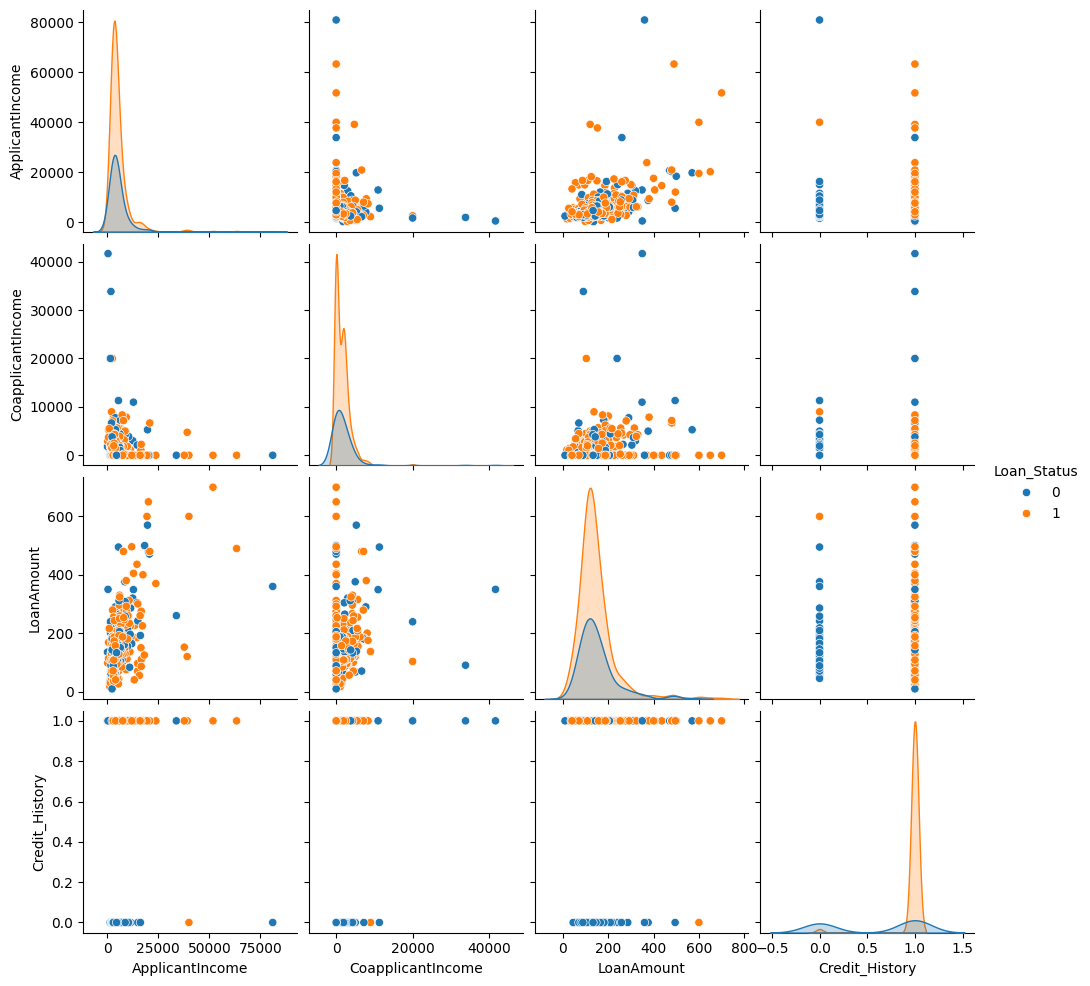

In [65]:
sns.pairplot(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History', 'Loan_Status']], hue='Loan_Status')
plt.show()


In [67]:
x = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [68]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_x = scaler.fit_transform(x)

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.1, random_state=42)

In [95]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold


In [96]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [97]:
for fold, (train_index, test_index) in enumerate(skf.split(scaled_x, y), 1):
    X_train, X_test = scaled_x[train_index], scaled_x[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # SVM with class weight
    model = svm.SVC(class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Fold {fold} Accuracy: {acc:.4f}")

Fold 1 Accuracy: 0.7805
Fold 2 Accuracy: 0.6748
Fold 3 Accuracy: 0.7317
Fold 4 Accuracy: 0.7724
Fold 5 Accuracy: 0.7869


In [98]:
y_pred = model.predict(X_test)

In [99]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Accuracy Score: 0.7868852459016393


In [100]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[19 19]
 [ 7 77]]


In [101]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.50      0.59        38
           1       0.80      0.92      0.86        84

    accuracy                           0.79       122
   macro avg       0.77      0.71      0.72       122
weighted avg       0.78      0.79      0.77       122



In [102]:
df['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
1,0.687296
0,0.312704
